# WEEK-2 Assignment(By-Ayush Paul)

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Bank_Dataset

In [2]:
bank_data_full=pd.read_csv('C:/Users/Admin/Desktop/ACM/ML LOC MENTOR/bank-full.csv')
bank_data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [117]:
X_full=bank_data_full.copy()
X_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Function-1

In [120]:
def get_data_splits(X_full_1,train_perc):
    #Checking to see if the given dataset has or has not the prediction target column
    try: 
        #Dropping the Prediction Target Column
        y=X_full_1.y.copy()
        X_full=X_full_1.drop(columns=['y']).copy()
    except:
        X_full=X_full_1
        
        #Splitting the data into test and validation dataset
        X_train_full,X_test_full=train_test_split(X_full,train_size=train_perc)
        #Selecting categorical columns for OneHotEncoding
        categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<13 and X_train_full[cname].dtype == "object"]

        #Selecting numerical columns for SimpleImputation
        numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]
        # Keep selected columns only
        my_cols = categorical_cols + numerical_cols

        #Merge the selected columns for the Final Training and Validation DataSet
        X_train = X_train_full[my_cols].copy()
        X_valid = X_test_full[my_cols].copy()
        return X_train,X_valid
    else:
        #Splitting the data into test and validation dataset
        X_train_full,X_test_full,y_train,y_valid=train_test_split(X_full,y,train_size=train_perc)
        #Selecting categorical columns for OneHotEncoding
        categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<13 and X_train_full[cname].dtype == "object"]

        #Selecting numerical columns for SimpleImputation
        numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]
        # Keep selected columns only
        my_cols = categorical_cols + numerical_cols

        #Merge the selected columns for the Final Training and Validation DataSet
        X_train = X_train_full[my_cols].copy()
        X_valid = X_test_full[my_cols].copy()
        return X_train,X_valid,y_train,y_valid

## Function-2

In [119]:
def train_model(X_train,y_train):
    #Preprocessing for numerical data.Using Simple Imputer to replace 
    #NaN values with the mean value of the particular column
    numerical_transformer = SimpleImputer(strategy='mean')
    # Preprocessing for categorical data.When the OneHotEncoder parameter is set to ‘ignore’ and an 
    #unknown category is encountered during transform, the resulting one-hot encoded 
    #columns for this feature will be all zeros
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    #Selecting categorical columns for OneHotEncoding
    categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique()<13 and X_train[cname].dtype == "object"]

    #Selecting numerical columns for SimpleImputation
    numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']]
    # Keep selected columns only
    my_cols = categorical_cols + numerical_cols
    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    #Initializing Value of K for KNN Algorithm
    k=int(round(np.sqrt(X_train.shape[0])))
    if k%2==0:
        k=k+1
    #Define Model
    model = KNeighborsClassifier(n_neighbors=k)
    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])
    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train, y_train)
    return my_pipeline

## Function-3

In [118]:
def get_model_score(model,X_valid,y_valid):
    """Function Defintion --- The function takes three parameters model(the trained model),the validation
       or test data and the prediction target for calculation of accuracy score. It returns the prediction
       as an numpy array."""
    #Cross-Validation with 7 folds
    cv_scores = cross_val_score(model, X_valid,y_valid, 
                            cv=7,
                            scoring='accuracy')
    preds=model.predict(X_valid)
    matrix=confusion_matrix(y_valid,preds)
    print("Confusion Matrix :") 
    print(confusion_matrix(y_valid,preds)) #Print Confusion Matrix
    print()
    print("Cross-validation accuracy: %f" % cv_scores.mean()) #Print Cross-Validation Score
    group_names = ['True_Pos','True_Neg','False_Pos','False_Neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
    return preds,matrix #return predictions

## Driver Code-1

In [121]:
train_X,valid_X,train_y,valid_y=get_data_splits(X_full,0.8)

In [122]:
my_model=train_model(train_X,train_y)
my_model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']

Confusion Matrix :
[[7904  104]
 [ 908  127]]

Cross-validation accuracy: 0.885989


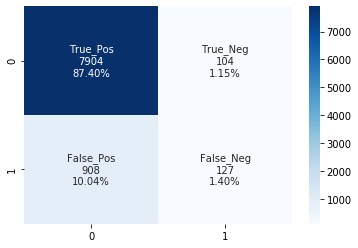

In [123]:
prediction,matrix=get_model_score(my_model,valid_X,valid_y)

## Driver Code-2 (To be used during Evaluation)

In [ ]:
prediction_1,matrix_1=get_model_score(my_model,X_test,y_test)